# Chapter 6 - Scientific Computing (Python)

### Unleash the Power of Python using Libraries!

# Today
- Recap
- How did you manage with Chapter 6?
- What was difficult?
- How did you solve the exercises?

# NumPy, SciPy, Matplotlib, etc

Core python have basic **data types**:

- Text Type: `str`
- Numeric Types: `int`, `float`, `complex`
- Sequence Types: `list`, `tuple`, `range`
- Mapping Type: `dict`
- Set Types: `set`, `frozenset`
- Boolean Type: `bool`
- Binary Types: `bytes`, `bytearray`, `memoryview`

The language is extended (new data types introduced) by **libraries** (or "packages")

## NumPy

Introduces the new data type: `Array`

**List**: A list in Python is a collection of items which can contain elements of multiple data types.

**Array**: An array is a vector containing homogeneous elements i.e. belonging to the same data type.

In addition, the kind of operations you can do on lists and arrays are different.


## NumPy

In addition, the kind of operations you can do on lists and arrays are different (see p. 186)

In [106]:
a_list = [1, 2, 3]
a_list + [4]

[1, 2, 3, 4]

In [107]:
import numpy as np
an_array = np.array([1, 2, 3])
an_array + [4]

array([5, 6, 7])

In [108]:
import matplotlib
%matplotlib inline
%cd /home/nylander/Documents/Projects/GIT/BIOinfo-course/slides

/home/nylander/Documents/Projects/GIT/BIOinfo-course/slides


In [ ]:
import numpy as np
import skimage.io as io
image = io.imread("../CSB/scientific/data/Kacsoh2013_Drosobrain.png")
io.imshow(image)

In [ ]:
red = image[:,:,0]
green = image[:,:,1]
img_copy = image.copy()
img_copy[:, 480:500, 0] = 100
threshold = 100
mask = red > threshold
io.imshow(mask)

In [ ]:
mask2 = red * (red > threshold)
io.imshow(mask2)

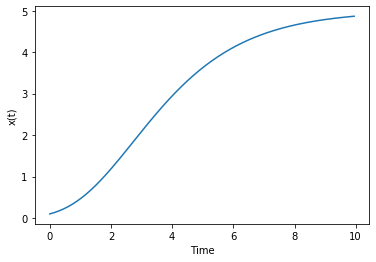

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.integrate

def Gompertz(x, t, alpha, K):
    dxdt = x * alpha * np.log(K / x)
    return dxdt

x0 = 0.1
alpha = 1 / 2
K = 5
ts = np.arange(0, 10, 0.05)
y = scipy.integrate.odeint(Gompertz, x0, ts, args = (alpha, K))

plt.plot(ts, y[:,0])
plt.xlabel("Time")
plt.ylabel("x(t)")
plt.show()

## Intermezzo 6.1b

In [ ]:
import numpy as np
import scipy.integrate

def fitness(x, A):
    """
    compute the fitness of all types
    given payoff matrix A
    and proportions x
    (with x[1] + x[2] + ... + x[n] = 1)
    """
    return(np.dot(A, x))

def replicator(x, t, A):
    """
    replicator dynamics
    for linear fitness
    d xi / dt = xi ((A x)i - x^t A x)
    """
    fi = fitness(x, A)
    phi = sum(x0 * fi)
    return(x * (fi - phi))

A = np.reshape([0, 1, -1,
               -1, 0, 1,
                1, -1, 0], (3, 3))

t = np.linspace(0,100,1000)

x0 = np.array([1/4, 1/4, 1/2])

x = scipy.integrate.odeint(replicator, x0, t, args = (A,))

get_ipython().magic(u"matplotlib inline")

import matplotlib.pyplot as plt
plt.plot(t, x[:, 0], label = "x1")
plt.plot(t, x[:, 1], label = "x2")
plt.plot(t, x[:, 2], label = "x3")
plt.legend(loc = "best")
plt.xlabel("t")
plt.grid()
plt.show()

# Pandas (p. 202)

Introduces two **new data structures**

- `Series` - a one-dimensional labeled array capable of holding data of any type

- `DataFrame` - intuitively, "a spreadsheet"

In [162]:
%cd /home/nylander/Documents/Projects/GIT/BIOinfo-course/slides

/home/nylander/Documents/Projects/GIT/BIOinfo-course/slides


### Subsetting (R-like syntax) (p. 205)

In [163]:
import pandas
import numpy as np

data = pandas.read_csv("../CSB/scientific/data/Dale2015_data.csv")

In [164]:
data["Male_plumage_score"]

0       51.944444
1       47.777778
2       43.611111
3       39.166667
4       54.166667
          ...    
5826    47.500000
5827    52.500000
5828    48.055556
5829    45.416667
5830    47.500000
Name: Male_plumage_score, Length: 5831, dtype: float64

In [165]:
data["Male_plumage_score"] > 65

0       False
1       False
2       False
3       False
4       False
        ...  
5826    False
5827    False
5828    False
5829    False
5830    False
Name: Male_plumage_score, Length: 5831, dtype: bool

In [166]:
data[data["Male_plumage_score"] > 65]

,Scientific_name,English_name,TipLabel,Female_plumage_score,Male_plumage_score
94,Aethopyga mystacalis,Scarlet Sunbird,Aethopyga_mystacalis,36.527778,66.111111
102,Agelaius assimilis,Red-shouldered Blackbird,Agelaius_assimilis,62.083333,65.833333
105,Agelaius tricolor,Tricoloured Blackbird,Agelaius_tricolor,50.416667,66.111111
108,Agelasticus thilius,Yellow-winged Blackbird,Agelasticus_thilius,42.777778,65.138889
184,Amaurospiza carrizalensis,Carrizal Seedeater,Amaurospiza_carrizalensis,38.611111,65.694444
...,...,...,...,...,...
5587,Vidua raricola,Jambandu Indigobird,Vidua_raricola,43.055556,65.416667
5590,Vidua wilsoni,Pale-winged Indigobird,Vidua_wilsoni,48.333333,65.138889
5645,Xenodacnis parina,Tit-like Dacnis,Xenodacnis_parina,47.777778,65.555556
5647,Xenopipo atronitens,Black Manakin,Xenopipo_atronitens,37.638889,66.805556


#### Slice with a list (p. 207)

In [167]:
["Male_plumage_score"] # List object

['Male_plumage_score']

In [114]:
["Male_plumage_score","Female_plumage_score"] # List object

['Male_plumage_score', 'Female_plumage_score']

In [115]:
data["Male_plumage_score"] # Returns a Series object

0       51.944444
1       47.777778
2       43.611111
3       39.166667
4       54.166667
          ...    
5826    47.500000
5827    52.500000
5828    48.055556
5829    45.416667
5830    47.500000
Name: Male_plumage_score, Length: 5831, dtype: float64

In [116]:
data[["Male_plumage_score"]] # Returns a DataFrame object

,Male_plumage_score
0,51.944444
1,47.777778
2,43.611111
3,39.166667
4,54.166667
...,...
5826,47.500000
5827,52.500000
5828,48.055556
5829,45.416667


In [168]:
data[["Male_plumage_score","Female_plumage_score"]]

,Male_plumage_score,Female_plumage_score
0,51.944444,45.833333
1,47.777778,48.888889
2,43.611111,43.194444
3,39.166667,39.305556
4,54.166667,40.555556
...,...,...
5826,47.500000,44.444444
5827,52.500000,47.916667
5828,48.055556,49.027778
5829,45.416667,49.583333


## Two methods for boxplots provided by Pandas (p.207)

See
- <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.box.html>
- <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html>

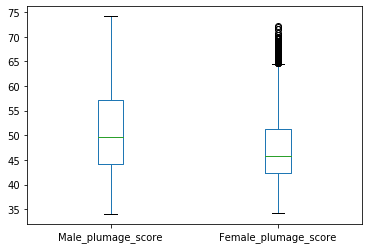

In [118]:
data[["Male_plumage_score","Female_plumage_score"]].plot.box()

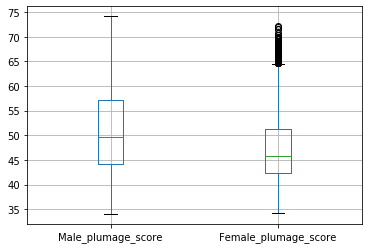

In [119]:
data[["Male_plumage_score","Female_plumage_score"]].boxplot()

## "Views", not copies (p. 206)
See <https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy>

In [120]:
import pandas
import numpy as np

data = pandas.read_csv("../CSB/scientific/data/Dale2015_data.csv")

In [121]:
high_male_score = data[data["Male_plumage_score"] > 65]

high_male_score["Qualitative_score"] = "High" # Error here

<ipython-input-121-b51c7a771bdf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_male_score["Qualitative_score"] = "High" # Error here


In [122]:
high_male_score = data[data["Male_plumage_score"] > 65].copy() # Use .copy() method here!

high_male_score["Qualitative_score"] = "High" # This should work!

high_male_score.head()

,Scientific_name,English_name,TipLabel,Female_plumage_score,Male_plumage_score,Qualitative_score
94,Aethopyga mystacalis,Scarlet Sunbird,Aethopyga_mystacalis,36.527778,66.111111,High
102,Agelaius assimilis,Red-shouldered Blackbird,Agelaius_assimilis,62.083333,65.833333,High
105,Agelaius tricolor,Tricoloured Blackbird,Agelaius_tricolor,50.416667,66.111111,High
108,Agelasticus thilius,Yellow-winged Blackbird,Agelasticus_thilius,42.777778,65.138889,High
184,Amaurospiza carrizalensis,Carrizal Seedeater,Amaurospiza_carrizalensis,38.611111,65.694444,High


# BioPython (p. 208)

### Search NCBI

In [134]:
from Bio import Entrez
Entrez.email = "bootstrap@linux.nu"
handle = Entrez.esearch(term = ("Uropsilus investigator[Organism]"), # Serch for. As tuple!
                        db = "nuccore")                              # In which database
record = Entrez.read(handle)
id_list = record["IdList"]

### Fetch from NCBI

In [137]:
outfile = "/home/nylander/tmp/Uropsilus_seq.fasta"
handle = Entrez.efetch(id = id_list[:10], # Provide the list of IDs to be downloaded
                       db = "nuccore",    # From which database
                       rettype = "fasta", # Save in fasta format
                       retmode = "text")
out_handle = open(outfile, "w")
for line in handle:
    out_handle.write(line)
out_handle.close()
handle.close()

# Here we need to manually close the file handles.
# Compare the "lazy" way of handling file handles using `with` on p. 114

## Reding a fasta file (p. 211)

**Note**: My search on NCBI (above) did not retrieve any sequences with "BMI1" in the description.

```python
from Bio import SeqIO
import re

output_handle = open("Uropsilus_BMI1.fasta", "w")
for record in SeqIO.parse("Uropsilus_seq.fasta", "fasta"):
    # find BMI1 sequences
    if re.search("BMI1", record.description):
        print(record.id)
        # shorten sequence by Python slicing
        short_seq = record[:100]
        SeqIO.write(short_seq, output_handle, "fasta")
output_handle.close()
```

### Alternative syntax for opening for reading and writing

In [144]:
from Bio import SeqIO
import re

search_for = "mitochondrion, complete genome"

infile = "/home/nylander/tmp/Uropsilus_seq.fasta"
outfile = "/home/nylander/tmp/Uropsilus_complete_mitochondrion.fasta"

informat = "fasta"
outformat = informat

with open(infile, "r") as infile_handle:
    with open(outfile, "w") as outfile_handle:
        for record in SeqIO.parse(infile_handle, informat):
            if re.search(search_for, record.description):
                print("bp:", len(record))
                SeqIO.write(record, outfile_handle, outformat)

bp: 16519


# Standalone BLAST

1) Install blast software from NCBI

2) Prepare a data base (fasta format)

3) Format the data base for blast

4) Run blast locally

5) Parse the output

### 1) Install blast software from NCBI

For example, on Debian/Ubuntu:

    sudo apt install ncbi-blast+
    
This will install several (~30) programs.

See also:

- <https://ftp.ncbi.nlm.nih.gov/blast/executables/blast+/LATEST/>

- <https://blast.ncbi.nlm.nih.gov/Blast.cgi?PAGE_TYPE=BlastDocs&DOC_TYPE=Download>

### 2) Prepare a data base (fasta format)

Ready-made blast databases are available on NCBI (no need to run step 3)!
See <https://ftp.ncbi.nlm.nih.gov/blast/db/README>

Otherwise, prepare your own fasta file.

In [145]:
%%bash

mkdir -v -p $HOME/tmp/blast && cd $HOME/tmp/blast

# Fetch a fasta file with amino-acid sequences
wget "https://gist.github.com/nylander/a044690c63494674d9b4fb30ba27762d/raw/db.fas"

# And fetch a query examplefile. Nucleotide sequences.
wget "https://gist.github.com/nylander/a044690c63494674d9b4fb30ba27762d/raw/query.fas"

--2020-12-03 13:01:25--  https://gist.github.com/nylander/a044690c63494674d9b4fb30ba27762d/raw/db.fas
Resolving gist.github.com (gist.github.com)... 140.82.121.4
Connecting to gist.github.com (gist.github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gist.githubusercontent.com/nylander/a044690c63494674d9b4fb30ba27762d/raw/db.fas [following]
--2020-12-03 13:01:26--  https://gist.githubusercontent.com/nylander/a044690c63494674d9b4fb30ba27762d/raw/db.fas
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.84.133
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.84.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 257360 (251K) [text/plain]
Saving to: ‘db.fas.1’

     0K .......... .......... .......... .......... .......... 19% 11,1M 0s
    50K .......... .......... .......... .......... .......... 39% 8,04M 0s
   100K .......... .........

In [146]:
%cd /home/nylander/tmp/blast

/home/nylander/tmp/blast


### 3) Format the data base for blast

Requires software `makeblastdb` (installed together with the blast programs).

Note that the database sequences are amino acids (protein).

In [147]:
%%bash

makeblastdb -in db.fas -parse_seqids -dbtype prot -out db



Building a new DB, current time: 12/03/2020 13:01:50
New DB name:   /home/nylander/tmp/blast/db
New DB title:  db.fas
Sequence type: Protein
Deleted existing Protein BLAST database named /home/nylander/tmp/blast/db
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 500 sequences in 0.0294919 seconds.


### 4) Run blast locally

#### Alt. 1. Run from command line

`outfmt 5` is the (deafault) XML format, `outfmt 6` and `outfmt 7` are customizable tab-separated formats (without or with comments, respectively)

    blastx -db db -query query.fas -outfmt 5 -out blast_out.xml

#### Alt. 2. Run from inside python

In [148]:
from Bio.Blast.Applications import NcbiblastxCommandline
blastx_cline = NcbiblastxCommandline(query="query.fas", db="db", outfmt=5, out="blast_out.xml")
stdout, stderr = blastx_cline()

In [ ]:
from Bio.Blast.Applications import NcbiblastxCommandline
# Use outfmt=6 for tab separated output without comments, and outfmt=7 with comments
blastx_cline = NcbiblastxCommandline(query="query.fas", db="db", outfmt=6, out="blast_out.tsv")
stdout, stderr = blastx_cline()

### 5) Parse the output

#### Alt. 1. Use BioPython modules

See <http://biopython.org/DIST/docs/tutorial/Tutorial.html#sec119>

In [ ]:
from Bio.Blast import NCBIXML
E_VALUE_THRESH = 1e-20
for record in NCBIXML.parse(open("blast_out.xml")):
    if record.alignments:
        print("\n")
        print("QUERY: %s" % record.query[:100])
        for align in record.alignments:
            for hsp in align.hsps:
                if hsp.expect < E_VALUE_THRESH:
                    print("MATCH title and E-value: %s %.1E" % (align.title[:14], hsp.expect))

### 5) Parse the output

#### Alt. 2. Use Pandas

In [ ]:
import pandas as pd
from Bio import SearchIO

# Convert from XML to tsv unless you did run blast with outfmt 6 or 7
qresults = SearchIO.parse("blast_out.xml", "blast-xml")
SearchIO.write(qresults, "blast_out.tsv", "blast-tab")

# Use header=None if blast was run with outfmt=6
df = pd.read_table('blast_out.tsv', header=None)

# Manually add the headers for the default outfmt=6 columns
default_outfmt6_cols = 'qseqid sseqid pident length mismatch gapopen qstart qend sstart send evalue bitscore'.strip().split(' ')
df.columns = default_outfmt6_cols

# Do, e.g., some filtering for percent identity >= 99.0 and E-value <= 0.001
df_filtered = df[(df['pident'] >= 99.0) & (df['evalue'] <= 0.001)]

df_filtered


# Exercises?

# Assignment for next occasion (Dec 03, in two weeks)

- Chapter 6. Scientific Computing (Python)
- **Use the Slack channels (<https://bioinfo-course-2020.slack.com>)!**
